In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [3]:
fire_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02",
                       index_col="call_no", parse_dates=True)
total_pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                       index_col = "Id")

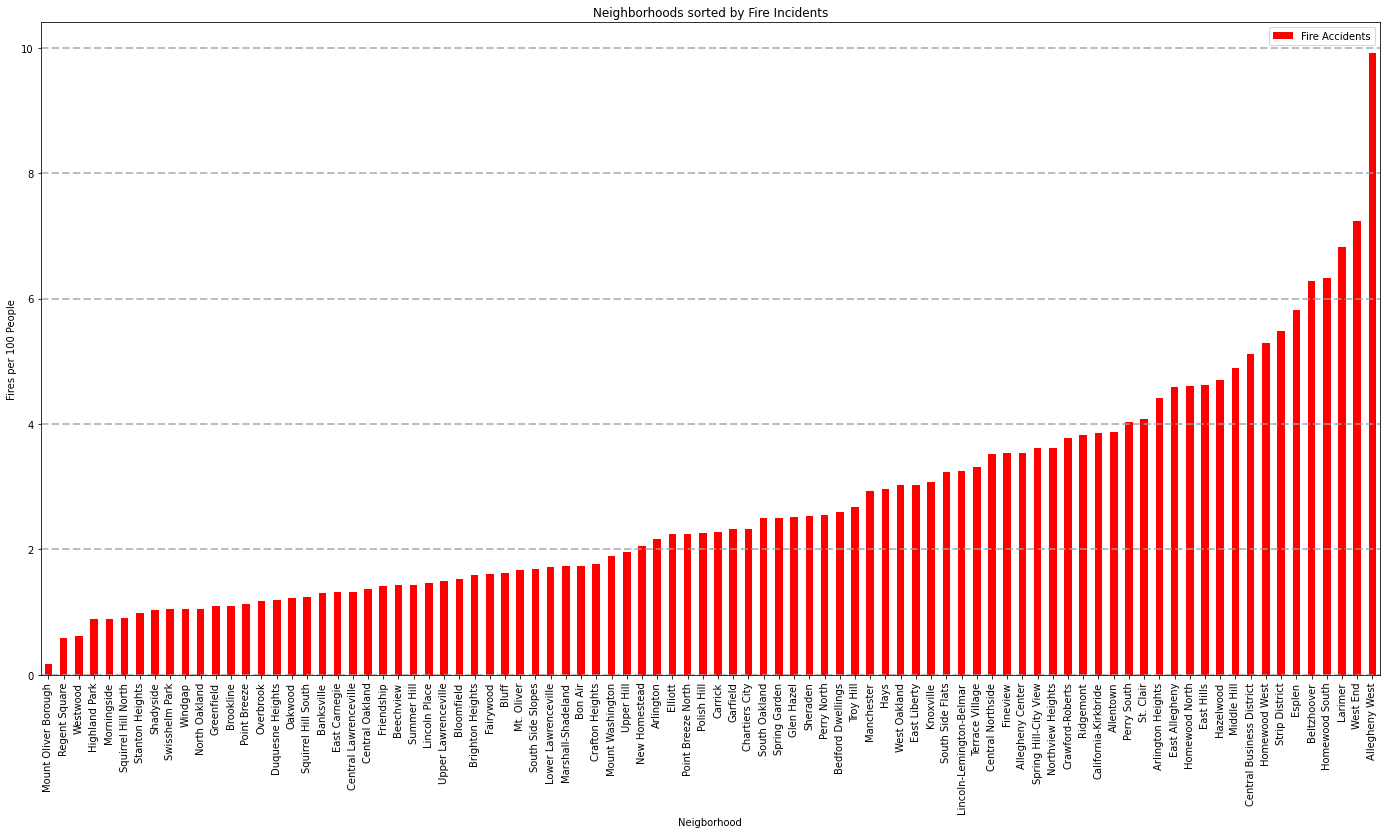

In [5]:
fires = dict()
pops = dict()

for i in range(len(fire_inc)):
    if(fire_inc.iloc[i,7] in fires):
        fires[fire_inc.iloc[i,7]] += 1
    else:
        fires[fire_inc.iloc[i,7]] = 1       

for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in fires):
            fires[total_pop.iloc[i,0]] = ((float)(fires.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)
sorted_fires = sorted(fires.items(), key=lambda x:x[1])

keys = []
values = []
for v in sorted_fires:
    keys.append(v[0])
    values.append(v[1])

for i in range(4):
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Fire Accidents'], index= keys)
df.plot(kind='bar', color = 'red')
plt.title("Neighborhoods sorted by Fire Incidents")
plt.xlabel("Neigborhood")
plt.ylabel("Fires per 100 People")
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [7]:
crime_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e", index_col="PK")

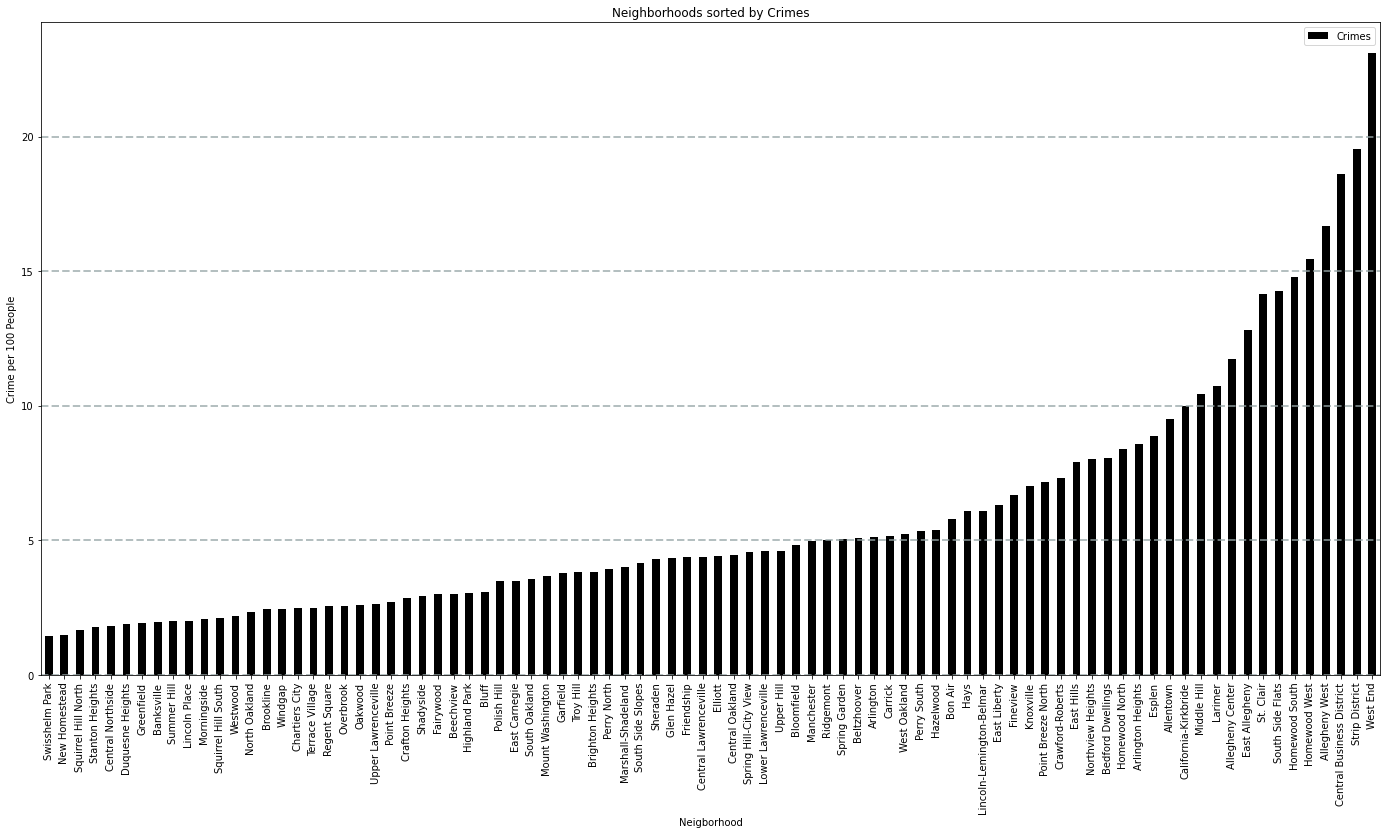

KeyError: 'Mount Oliver Borough'

In [30]:
crime = dict()
for i in range(len(crime_inc)):
    if(crime_inc.iloc[i,5] in crime):
        crime[crime_inc.iloc[i,5]] += 1
    else:
        crime[crime_inc.iloc[i,5]] = 1    
        
for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in crime):
            crime[total_pop.iloc[i,0]] = ((float)(crime.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)/15
sorted_crime = sorted(crime.items(), key=lambda x:x[1])

keys = []
values = []
for v in sorted_crime:
    keys.append(v[0])
    values.append(v[1])
    
for i in range(13):
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Crimes'], index= keys)
df.plot(kind='bar', color = 'black')
plt.title("Neighborhoods sorted by Crimes")
plt.xlabel("Neigborhood")
plt.ylabel("Crime per 100 People")
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()
print("Not Pictured, Mount Oliver Borough at", crime["Mount Oliver Borough"] )